# Dynamic Planning  
value iteration method
-  model base
-  value base

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

from functions import get_s_next, possible_a, soft_max_policy, pi_target, epsilon_greedy, make_subplot

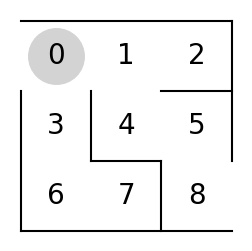

In [28]:
#迷路作成
fig = plt.figure(figsize=(3,3))

#壁
plt.plot([0, 3], [3, 3], color="k")
plt.plot([0, 3], [0, 0], color="k")
plt.plot([0, 0], [0, 2], color="k")
plt.plot([3, 3], [1, 3], color="k")
plt.plot([1, 1], [1, 2], color="k")
plt.plot([2, 3], [2, 2], color="k")
plt.plot([2, 1], [1, 1], color="k")
plt.plot([2, 2], [0, 1], color="k")

#数字
for i in range(3):
    for j in range(3):
        plt.text(0.5+i, 2.5-j, str(i+j*3), size=20, ha="center", va="center")

#円
circle, = plt.plot([0.5], [2.5], marker="o", color="#d3d3d3", markersize="40")

#メモリと枠の非表示
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", right="off", left="off", labelleft="off")
plt.box("off")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)



## information of MDP

In [29]:
#可能な行動のリスト
# possible_a

#状態遷移確率
# p_t = 1

#報酬関数g
g = np.zeros((9,4))
g[8,1] = 1 

#初期状態分布 s=0から

In [30]:
class ValueIteration:
    def __init__(self, ganma) -> None:
        self.ganma = ganma
        
    def B_asterisk(self, Q):
        Q_next = Q.copy()
        for s in range(Q.shape[0]):
            for a in range(Q.shape[1]):
                if [s,a] == [8,1]:
                    Q_next[s,a] = g[s,a]
                elif not get_s_next(s,a) == None:
                    Q_next[s,a] = g[s,a] + self.ganma * np.max(Q[get_s_next(s,a), :])
        delta = np.sum(Q_next - Q)
        return Q_next, delta
    
    def learning_B_asterisk(self, epoch, stop_epsilon):
        Q = np.zeros((9,4))
        delta_l = []
        for episode in range(epoch):
            Q, delta = self.B_asterisk(Q=Q,)
            delta_l.append(delta)
            if delta < stop_epsilon:
                break
        return Q, delta_l
    
    def B_pi(self, Q, pi):
        pi_table = pi(Q=Q)
        Q_next = Q.copy()
        for s in range(Q.shape[0]):
            for a in range(Q.shape[1]):
                if [s,a] == [8,1]:
                    Q_next[s,a] = g[s,a]
                elif not get_s_next(s,a) == None:
                        Q_next[s,a] = g[s,a] + self.ganma *  np.sum(pi_table[get_s_next(s,a),:] * Q[get_s_next(s,a), :])
        delta = np.sum(Q_next - Q)
        return Q_next, delta
    
    def learning_B_pi(self, pi, epoch, stop_epsilon):
        Q = np.zeros((9,4))
        delta_l = []
        for episode in range(epoch):
            Q, delta = self.B_pi(Q=Q, pi=pi)
            delta_l.append(delta)
            if delta < stop_epsilon:
                break
        return Q, delta_l

In [31]:
ganma_l = [0.9, 0.8, 0.7, 0.6]
vi = ValueIteration(ganma=0.9)
delta_pi_l = []
delta_ast_l = []
for ganma in ganma_l:
    vi.ganma = ganma
    Q_pi, delta_pi = vi.learning_B_pi(pi=epsilon_greedy, epoch=1000, stop_epsilon=10e-3)
    Q_asterisk, delta_asterisk = vi.learning_B_asterisk(epoch=1000, stop_epsilon=10e-3)
    delta_pi_l.append(delta_pi)
    delta_ast_l.append(delta_asterisk)

In [32]:
# pi_d1 = pi_target(Q_pi)
# pi_d2 = pi_target(Q_asterisk)

# print("Q_pi")
# print(Q_pi)
# print(pi_d1)

# print()
# print("Q_asterisk")
# print(Q_asterisk)
# print(pi_d2)

# print()
# print(f"answer \n[1, 2, 3, 0, 1, 2, 0, 3, 1]")

- 終了処理、一つしか行動がとれないときの例外処理を忘れていたためエラーが多かった
- epsilonが0.1だと状態７に到達しなかったが、0.3にすると７も訪問し、最適解を導けていた。
- B*の方が安定している
- B_piは収束は早いが、局所解に陥ることがある！

delta


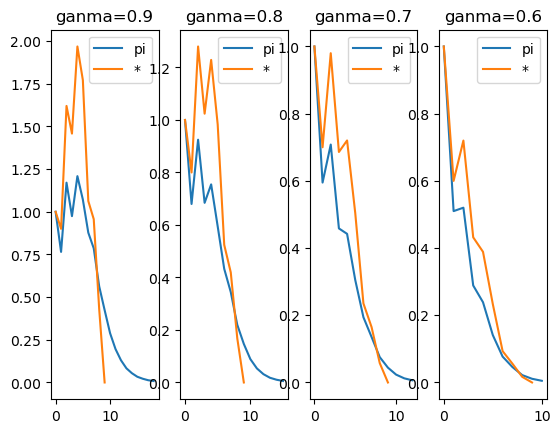

In [33]:
print("delta")
graph = plt.figure()
for i, ganma in enumerate(ganma_l):
    make_subplot(graph=graph, place=[1, len(ganma_l), i+1], title=f"ganma={ganma}", v=[delta_pi_l[i], delta_ast_l[i]], label_list=["pi", "*"])
plt.show()


In [34]:
""" def animate(i):
    state = s_a_history[i][0]
    circle.set_data((state % 3) + 0.5, 2.5 - int(state/3))
    return circle

anim = animation.FuncAnimation(fig, animate, frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml()) """

' def animate(i):\n    state = s_a_history[i][0]\n    circle.set_data((state % 3) + 0.5, 2.5 - int(state/3))\n    return circle\n\nanim = animation.FuncAnimation(fig, animate, frames=len(s_a_history), interval=200, repeat=False)\nHTML(anim.to_jshtml()) '